In [ ]:
"""
Import package of dealing with Fermi data
"""
from gw_grb_correlation.Fermi.data_preprocessing import create_dataframe_and_name_column_from_data_files, download_and_preprocess_fermi_data
from gw_grb_correlation.Fermi.download_data_functions import download_file


AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
"""
Download and preprocess Fermi data
"""
start_year = 2015
end_year = 2026
fermi_data = download_and_preprocess_fermi_data(start_year=start_year, end_year=end_year, download_or_not=True)

In [ ]:
"""
Optional: If you don't want to download the raw data from Fermi database (which will take 12 hours), you can download the preporcessed data from the following link
Note that this data only conatins the Fermi data from 2015 to 2025 April. 
"""
import os

os.makedirs("fermi_data", exist_ok=True)
os.makedirs("fermi_data/fermi", exist_ok=True)

"""
Google Drive download URLs
"""
downloads = {
    "https://drive.google.com/uc?id=18fEbzKDVn8_-Y8d8MnQLKrAgSFT4Vmlu": "./fermi_data/fermi/fermi_data.npy",
}

"""
Download files
"""
for url, output_path in downloads.items():
    download_file(url, output_path)

fermi_data = create_dataframe_and_name_column_from_data_files(data_type="fermi")

<Figure size 1000x600 with 0 Axes>

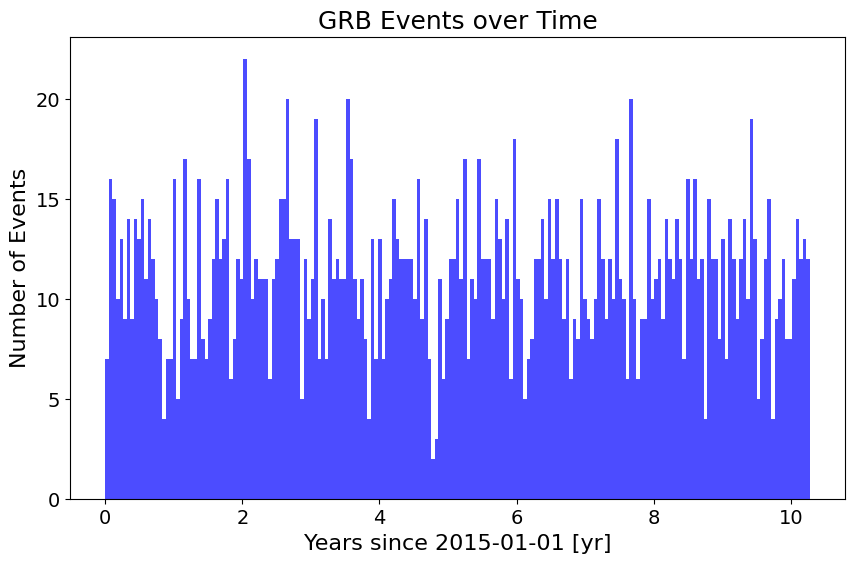

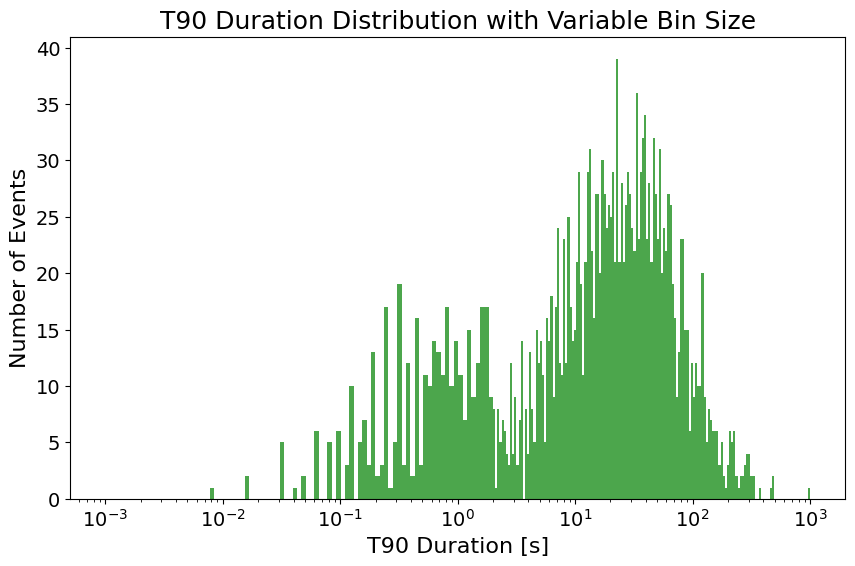

In [ ]:
"""
Extract time data, and plot histograms of time and T90 duration of GRBs
"""
from gw_grb_correlation.Fermi.visualization import create_time_data_plots

create_time_data_plots(fermi_data, 'plots')

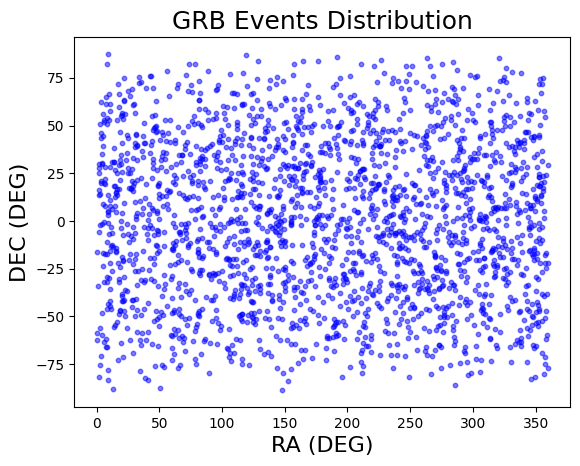

In [ ]:
"""
Extract location data, and plot histograms of location data of GRBs
"""
from gw_grb_correlation.Fermi.visualization import create_location_data_plots
create_location_data_plots(fermi_data, 'plots')

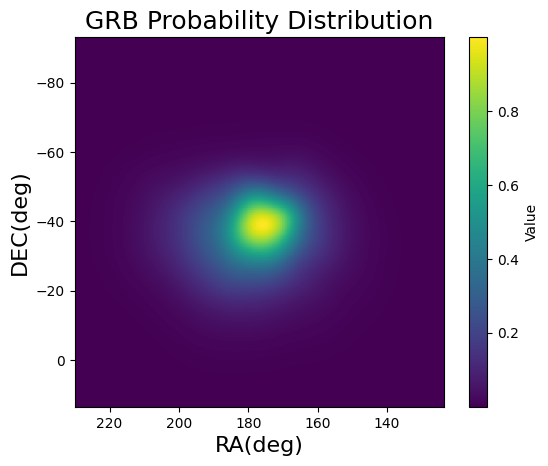

In [ ]:
"""
Plot the poseterior of GRB location of a specific GRB event
"""
from gw_grb_correlation.Fermi.visualization import plot_certain_event_prob_dist

url_locprob = "https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/bursts/2017/bn170817529/current/glg_locprob_all_bn170817529_v02.fit"
filename_locprob = "glg_locprob_all_bn170817529_v02.fit"

download_file(url_locprob, filename_locprob)
plot_certain_event_prob_dist(filename_locprob, 'plots')

C:\Users\colon\OneDrive\桌面\TheoryWork\group_project_2025\gw_grb_correlation\Fermi\visualization.py:489: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(ra, dec, s=100, c=colors(num), alpha=0.5, label=name)


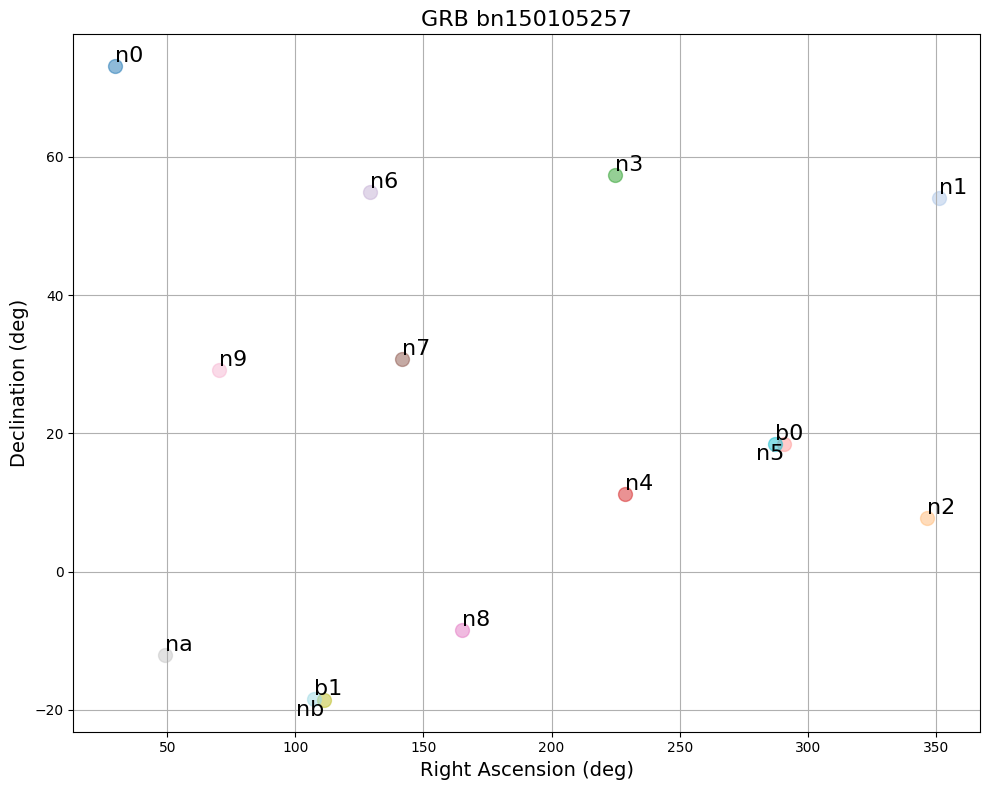

In [ ]:
"""
Plot the pointing of all detectors on Fermi GBM on the skymap during one GRB event
"""
from gw_grb_correlation.Fermi.visualization import plot_all_detector_positions
plot_all_detector_positions(fermi_data.head(1), plt_show_or_not=True)

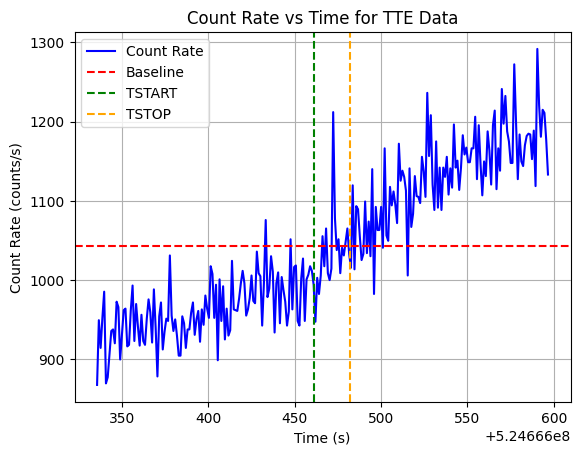

In [ ]:
from gw_grb_correlation.Fermi.visualization import plot_light_curve_with_baseline_subtraction
"""
Download the tte data for the specific event
"""
url_tte = "https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/bursts/2017/bn170817529/current/glg_tte_n2_bn170817529_v00.fit"
filename_tte = "glg_tte_n2_bn170817529_v00.fit"

download_file(url_tte, filename_tte)

"""
Download the bcat data for the specific event
"""
url_bcat = "https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/bursts/2017/bn170817529/current/glg_bcat_all_bn170817529_v01.fit"
filename_bcat = "glg_bcat_all_bn170817529_v01.fit"

download_file(url_bcat, filename_bcat)

"""
Plot the light curve with baseline subtraction
"""
plot_light_curve_with_baseline_subtraction(filename_tte, filename_bcat, output_folder='./plots')

In [ ]:
from gw_grb_correlation.Fermi.util import duration, filtering, read_GW_data
"""
Filter out short GRB data
"""
short_GRB_data = filtering(fermi_data, criteria={'T90': lambda x: x <= 2.1})

"""
Calculate the duration (difference between max TSTOP and min TSTART) and count the short GRB event number
"""
duration_short_GRB = duration(short_GRB_data)
event_num_short_GRB = len(short_GRB_data)

"""
Calculate the average occurrence rate of short GRB (events per unit of time)
"""
average_occurrence_rate = event_num_short_GRB / duration_short_GRB

"""
Print the results
"""
print(f"Number of short GRB: {event_num_short_GRB}")
print(f"Total duration: {duration_short_GRB} seconds")
print(f"Average occurrence rate: {average_occurrence_rate} short GRB per second")

Number of short GRB: 357
Total duration: 323245732.96269 seconds
Average occurrence rate: 1.1044229315200459e-06 short GRB per second


In [ ]:
from gw_grb_correlation.Fermi.util import read_GW_data, remove_duplicate_times_in_gw_data, compare_time_within_range
"""
Load GW data
To run the time correlation analysis between GRB and GW, be sure that you already run the GW data preprocessing notebook first to get the totalgwdata.csv file and places it in the ./gw_data/ directory.
"""
gw_data = read_GW_data(f"./gw_data/totalgwdata.csv")
gw_times = remove_duplicate_times_in_gw_data(gw_data)

"""
Find matched GRB-GW event pairs
"""
match = compare_time_within_range(short_GRB_data, gw_times, time_range_seconds=86400*3)
filtered_gw_events = gw_data[gw_data['times'].isin(match['gw_time'])]

"""
Save the matched GRB-GW event pairs and filtered GW events to CSV files
"""
match.to_csv("GRB_GW_event_pairs.csv", index=False)
filtered_gw_events.to_csv("Filtered_GW_events.csv", index=False)

Data from ./gw_data/totalgwdata.csv loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418227 entries, 0 to 2418226
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ra          float64
 2   dec         float64
 3   times       float64
 4   weights     float64
dtypes: float64(4), int64(1)
memory usage: 92.2 MB
None
   Unnamed: 0        ra       dec         times   weights
0           0  1.891867 -1.250744  1.126259e+09  0.000024
1           1  1.254342 -1.228042  1.126259e+09  0.000024
2           2  1.666787 -1.279668  1.126259e+09  0.000024
3           3  1.863250 -1.261367  1.126259e+09  0.000024
4           4  0.994238 -1.036272  1.126259e+09  0.000024
Number of unique times after applying threshold: 91
First few unique times:
               times                          date
0       1.126259e+09 2015-09-14 09:51:02.000000000
44173   1.128679e+09 2015-10-12 09:55:00.000000000
79620   1.135136e+09 20

C:\Users\colon\OneDrive\桌面\TheoryWork\group_project_2025\gw_grb_correlation\Fermi\util.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fermi_data['ALIGNED_SEC'] = pd.to_numeric(fermi_data['TSTART'], errors='coerce')
C:\Users\colon\OneDrive\桌面\TheoryWork\group_project_2025\gw_grb_correlation\Fermi\util.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fermi_data['ALIGNED_SEC'] = fermi_data['ALIGNED_SEC'] + (fermi_start_date - pd.Timestamp("1980-01-01")).total_seconds()


Found 44 matches within 259200 seconds.
